In [1]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
# connect to google
pytrends = TrendReq(hl='en-US', tz=360)
# keywords to search for
pytrends.build_payload(kw_list=['data science'])


In [3]:
#dataframe
time_df = pytrends.interest_over_time()
time_df = time_df.drop('isPartial', axis = 1)


In [4]:
time_df.head()

,data science
date,
2017-10-08,37
2017-10-15,35
2017-10-22,37
2017-10-29,36
2017-11-05,37


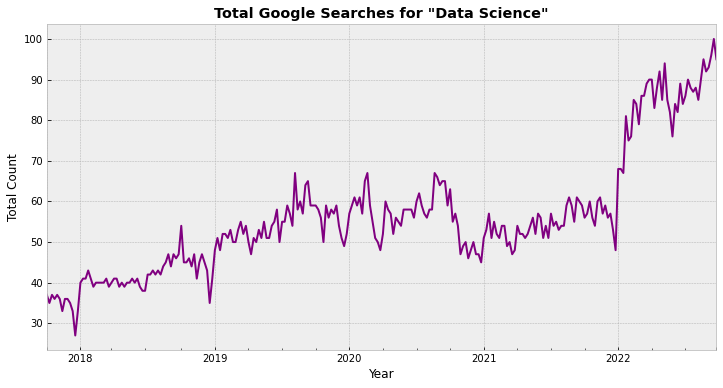

In [5]:
# creating graph
fig, ax = plt.subplots(figsize=(12, 6))
time_df['data science'].plot(color='purple')
# adding title and labels
plt.title('Total Google Searches for "Data Science"', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.savefig('ds.png', format='png', dpi=300)

# WHAT ARE THE TOP COUNTRIES SEARCHING FOR DATA SCIENCE?

In [6]:
#extract country-level kewords search data
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the highest searches of "Python"
time_df2 = country_data['data science'].nlargest(10)

#convert to dataframe
time_df2  = time_df2 .to_frame()

time_df2 

,data science
geoName,
Zimbabwe,100
Rwanda,94
China,85
Singapore,85
India,82
Ethiopia,77
Botswana,71
Lesotho,70
Nigeria,69


In [7]:
time_df4 = time_df2[:10]

In [8]:
time_df4

,data science
geoName,
Zimbabwe,100
Rwanda,94
China,85
Singapore,85
India,82
Ethiopia,77
Botswana,71
Lesotho,70
Nigeria,69


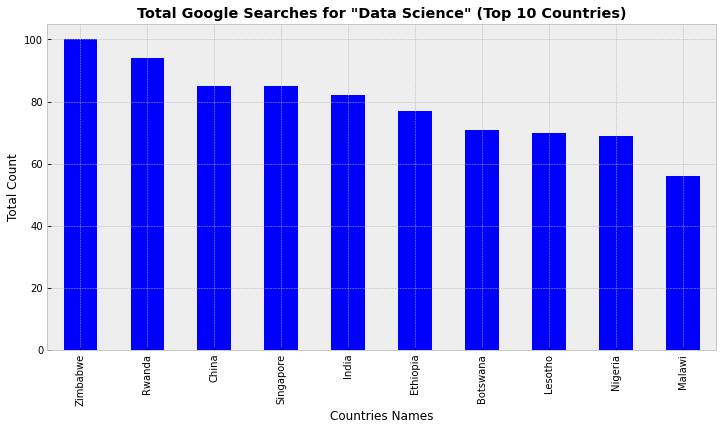

In [9]:
# creating graph
fig, ax = plt.subplots(figsize=(12, 6))
time_df4['data science'].plot.bar(color='blue')
# adding title and labels
plt.title('Total Google Searches for "Data Science" (Top 10 Countries)', fontweight='bold')
plt.xlabel('Countries Names')
plt.ylabel('Total Count')
plt.savefig('dc.png', format='png', dpi=300)